## Growth Curve Model (GCM)

### 1. Introduction

The first family of models used for the measurement of change that we will cover today is Growth Curve Models (GCMs). These models are ideal for research scenarios with **several** repeated measurements over time. In other words, these models are a good choice when working with more intense longitudinal data. The reason for this is that we will not be only looking at differences between 2 time-points, but at a trajectory of change over time. 

In [2]:
#######################################################
## Specify R environment for rpy2
#import os
#os.environ['R_HOME'] = r'C:/Program Files/R/R-4.4.3'  # Replace with your R path
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula
import contextlib
# Ipython extension for plotting
%load_ext rpy2.ipython
########################################################

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

c:\Users\danie\.conda\envs\psy112ER\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


### 2. Data Exploration

The `anx` data frame contains results from an anxiety test applied to 485 children at 4 different time-points (t1, t2, t3, t4). Additionally, the data frame contains binary-coded information about the parents' employment status (0 = at least one parent is unemployed, 1 = employed). This variable was considered given the growing evidence that early anxiety can be elicited by whether or not the parents have a job. Feel free to use the code chunks to explore the data frames and gain a good overview.

In [3]:
# Read the CSV file using a relative path
anx = pd.read_csv("../LSCM_and_GCM/Datasets/anx.csv")

# Display the first few rows of the dataframe
print(anx.head())

   id  ES        t1        t2        t3        t4
0   1   0  1.714286  1.500000  1.714286  1.928571
1   2   0  1.642857  1.642857  1.214286  1.928571
2   3   1  1.642857  2.000000  1.928571  1.857143
3   4   0  1.428571  1.857143  1.928571  1.857143
4   5   1  1.214286  1.571429  1.428571  1.785714


### 3. Linear GCM: Model Specification and Fit

Linear GCM models assume that change over time is linear. Although the `sem()` function could be used, it is better to employ the `growth()` function of `lavaan` because it includes special default settings for these models. 

In order to define a GCM, you should keep in mind that 2 latent variables representing the intercept and the slope need to be specified. All measured variables (time-points) in the data file should be regressed onto these two factors, such that their loadings are differently constrained: Whereas all factor loadings on the latent intercept are fixed to 1, the factor loadings on the latent slope factor are fixed as linearly increasing units (0, 1, 2, ..., t - depending on the number of measurement time-points). The next code declares, fits and plots a linear GCM:

R[write to console]: This is lavaan 0.6-19
lavaan is FREE software! Please report any bugs.



lavaan 0.6-19 ended normally after 45 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                27.288
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1182.102
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.981
  Tucker-Lewis Index (TLI)                       0.977

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -567.499
  Loglikelihood unrestricted model (H1)       -5

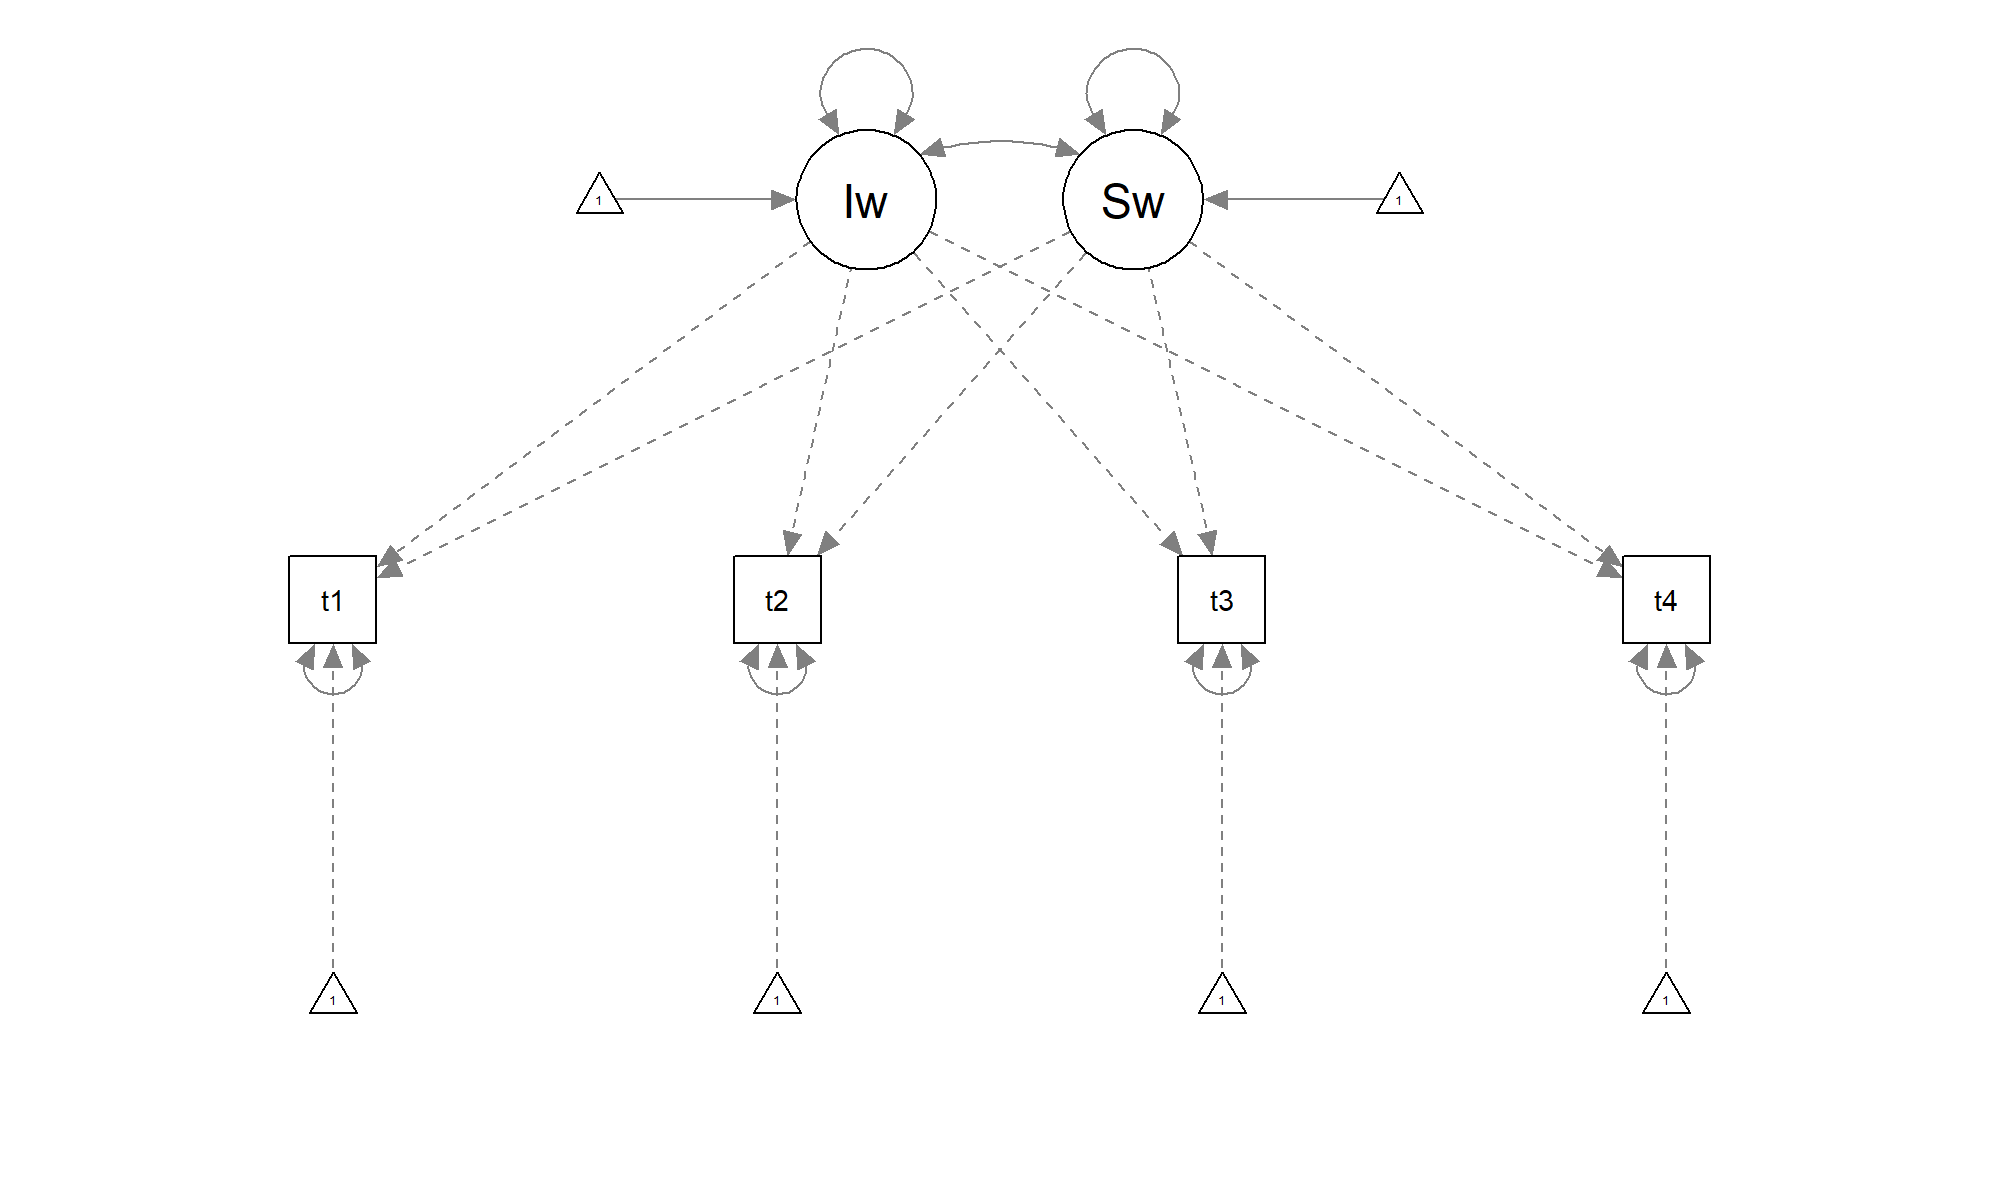

In [4]:
# Activate pandas2ri for automatic conversion
pandas2ri.activate()

# Import the lavaan package in R
ro.r('library(lavaan)')

# Import semPlot for plotting SEM paths
ro.r('library(semPlot)')

# Load the dataset into R
ro.globalenv['anx'] = pandas2ri.py2rpy(anx)

# Define the SEM model
ro.r('''
GCM1 <- '

#Intercept factor loadings are fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope factor loadings are increasingly fixed
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
'
     
''')

# Fit the SEM model
ro.r('fit1 <- growth(GCM1, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit1, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath1.png", width = 2000, height = 1200, res = 150)
semPaths(fit1)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath1.png"))

### 4. Output Interpretation

Before interpreting the parameters, we should assess the model fit. The fit indices are somewhat mixed. While the CFI (0.981) and TLI (0.977) values are excellent, indicating a good fit to the data, the RMSEA (0.096) is slightly high, and the Chi-Square test is significant (p < .001). This suggests that while the model provides a very good approximation of the data, there might still be some minor discrepancies. Given the strong CFI/TLI, we can proceed with interpreting the model's parameters.

Here’s a breakdown of what we can learn from the GCM1 output:

* **Model Specification Check**: It's good practice to first confirm that our fixed parameters are correctly specified. The output for the latent variables confirms that the factor loadings for the intercept (`Iw`) are all fixed to 1, and the loadings for the linear slope (`Sw`) are fixed to 0, 1, 2, and 3 for `t1`, `t2`, `t3`, and `t4` respectively. This confirms our model of linear growth.

* **Means (Intercepts)**: The intercept estimates reveal the average values for our latent growth factors.
    * The intercept for the latent intercept factor (`Iw`) is **0.698**. This represents the average anxiety score at the initial time point (t1).
    * The intercept for the latent slope factor (`Sw`) is **-0.062**. This value represents the average rate of linear change across the time points. The negative value indicates that, on average, children's anxiety scores decrease over time.

* **Covariances**: This section shows the relationship between the growth factors.
    * There is a significant negative covariance between the intercept and slope factors (`Iw ~~ Sw` = **-0.011**, p < 0.001). This is a key finding that is more difficult to obtain in a traditional MLM. It indicates that the initial level of anxiety is related to the rate of change. Specifically, the negative value means that individuals with *lower* initial anxiety scores tend to show a *stronger* linear growth in anxiety over time.

* **Variances**: The variances tell us about the individual differences in our sample.
    * The variances for both the intercept (`Iw` = **0.151**) and the slope (`Sw` = **0.007**) are significant. This is a crucial insight, as it tells us that there are substantial individual differences in both the starting levels of anxiety and the rate at which individuals' anxiety changes over time. In GCM, these are treated as random effects, meaning that each individual has their own unique starting point and growth trajectory.

### 5. Non-linear GCM: Model Specification and Fit

In the previous section, we explored a linear Growth Curve Model, which assumes that change over time follows a straight-line trajectory. This is a type of *parametric* model because we pre-specify the mathematical form of the growth.

However, not all change is linear. Growth Curve Models are highly flexible and can also capture non-linear patterns of change. These non-linear models can be broadly categorized:

* **Parametric Non-linear Models**: These models assume a specific, pre-defined curvilinear shape. For example, we could fit a *quadratic* model (to capture a U-shape) or a *cubic* model if we have strong theoretical reasons to expect a particular non-linear trajectory.
* **Non-parametric Non-linear Models**: These models do not impose a strict mathematical function on the shape of the growth. They are particularly useful for estimating changes that happen abruptly or have an unknown form, such as the effect of a planned intervention.

The model in the code below is an example of a **non-parametric** approach. It is designed to freely estimate the growth pattern by allowing the factor loadings to be estimated from the data. This approach is ideal for testing for a non-linear shift in the trajectory that might occur due to an intervention happening between time points `t2` and `t3`. By letting the factor loadings for the intermediate time points be freely estimated, we allow the data to determine the shape of the growth curve rather than forcing it to be linear.

lavaan 0.6-19 ended normally after 54 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                12.846
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.005

Model Test Baseline Model:

  Test statistic                              1182.102
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.992
  Tucker-Lewis Index (TLI)                       0.983

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -560.278
  Loglikelihood unrestricted model (H1)       -5

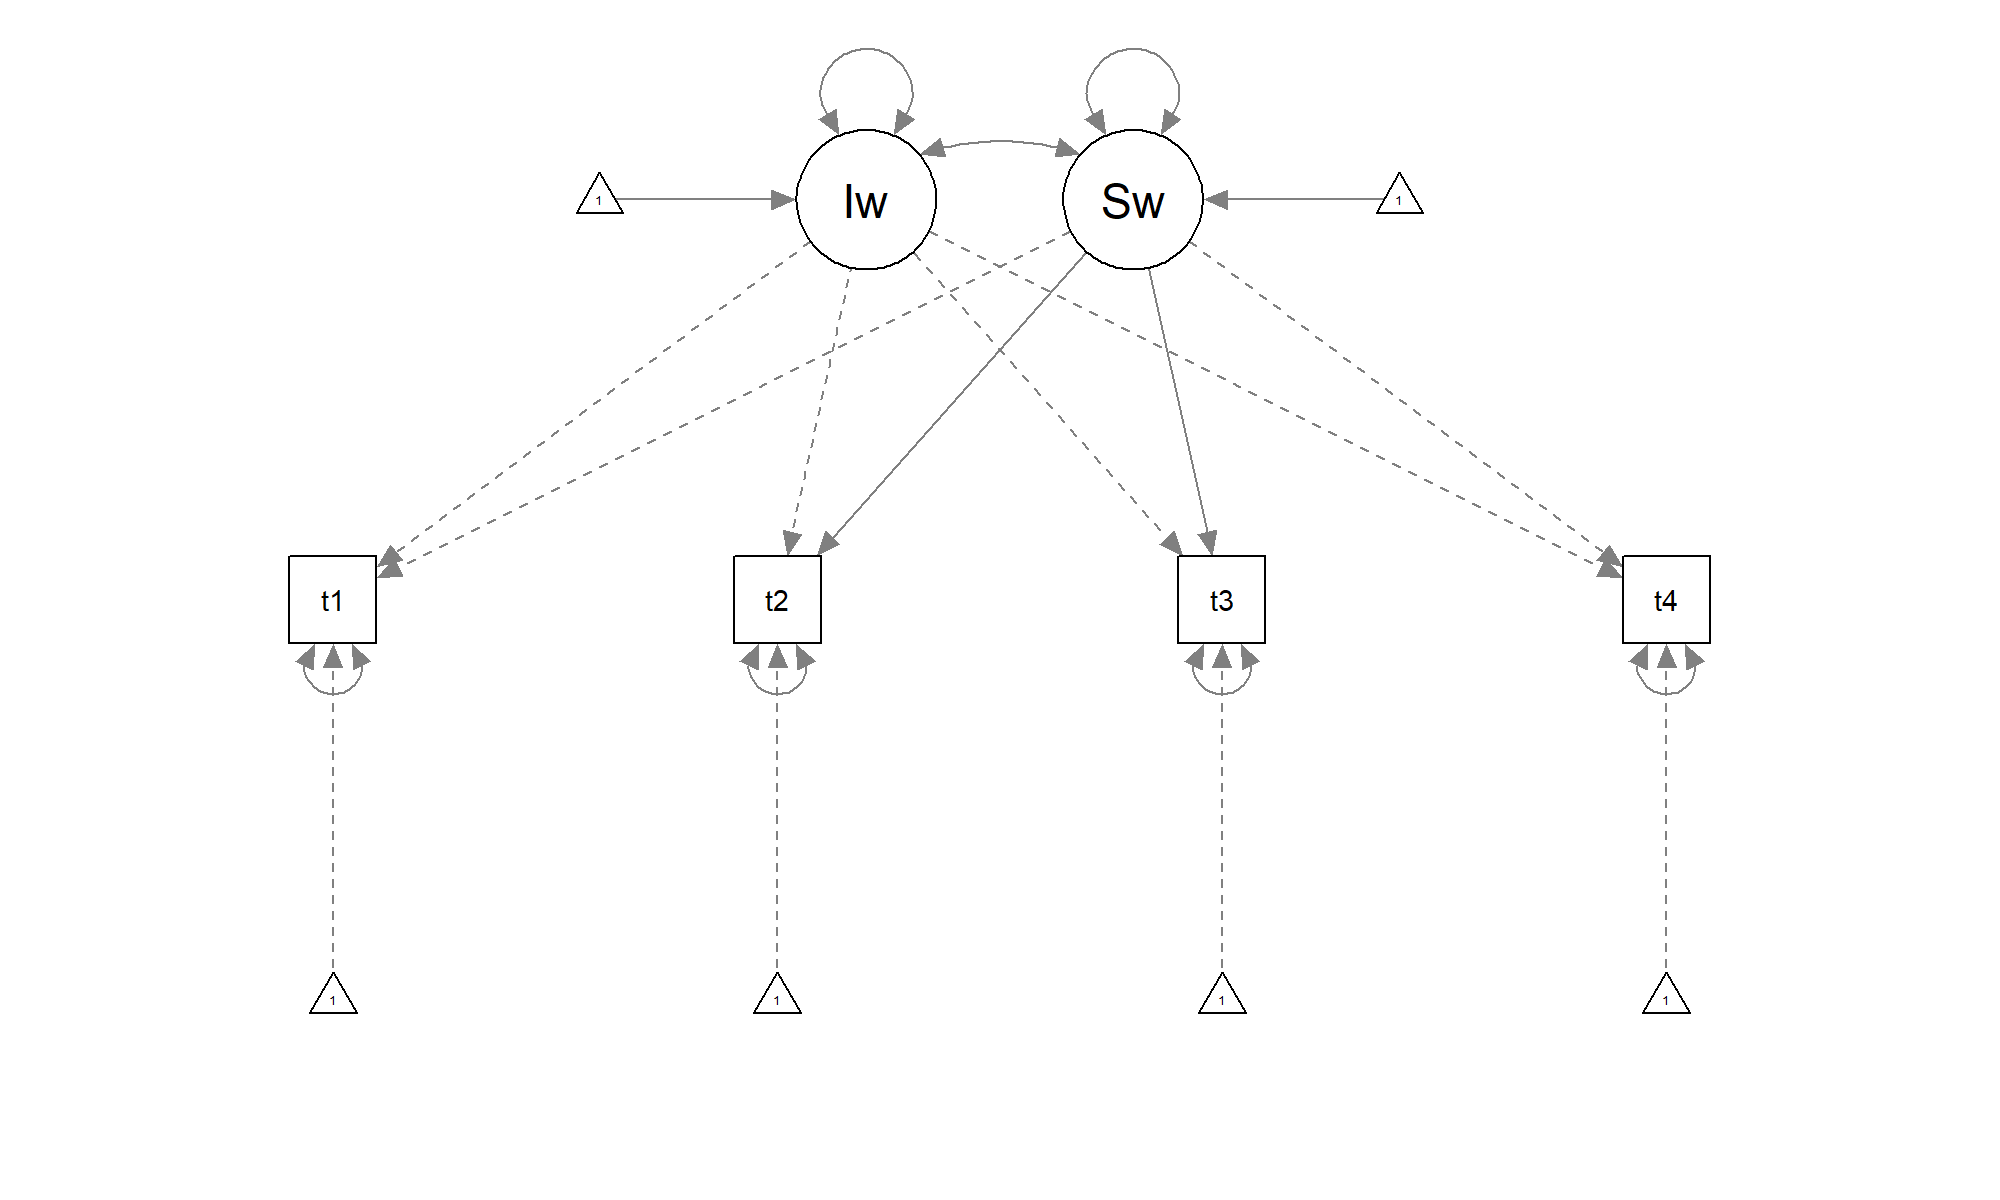

In [6]:
# Define the SEM model
ro.r('''
GCM2 <-  '
#Intercept fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Intermediate factor loadings are freely estimated
Sw =~ 0*t1 + NA*t2 + NA*t3 + 3*t4
'
     
''')

# Fit the SEM model
ro.r('fit2 <- growth(GCM2, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit2, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath2.png", width = 2000, height = 1200, res = 150)
semPaths(fit2)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath2.png"))

### 6. Output Interpretation

Similar to our previous model, we will first assess the model fit before interpreting the individual parameters. The fit indices for this non-linear model are quite good. The CFI (0.992) and TLI (0.983) are excellent, and the SRMR (0.040) is well below the standard cutoff. Although the Chi-Square test is significant (p = 0.005) and the RMSEA is borderline (0.082), the overall picture suggests that the model fits the data very well.

Here is a detailed breakdown of the model's parameters:

* **Factor Loadings (The Non-linear Growth)**: The essential difference from the linear GCM is found in the factor loadings for the slope factor (`Sw`). Instead of being fixed linearly (0, 1, 2, 3), the loadings for the intermediate time points were freely estimated, resulting in a pattern of **0, 1.712, 2.441, 3.000**. This pattern confirms that the growth is indeed non-linear. It suggests that the largest "jump" or change in anxiety occurs between `t1` and `t2`. The rate of change then decelerates between `t2` and `t3`, and again between `t3` and `t4`. This captures the non-parametric effect of the intervention that was hypothesized to occur between `t2` and `t3`.

* **Means (Intercepts)**:
    * The intercept for the latent intercept factor (`Iw`) is **0.723**, representing the average anxiety score at the initial time point (t1).
    * The intercept for the latent slope factor (`Sw`) is **-0.066**. This is the average rate of change, where the "unit" of change is now defined by the freely estimated non-linear loadings.

* **Covariances**:
    * There is a significant negative covariance between the intercept and slope factors (`Iw ~~ Sw` = **-0.017**, p = 0.001). As in the linear model, this indicates that individuals who started with lower initial anxiety scores tended to experience a greater rate of change over the four time points.

* **Variances**:
    * The variances for both the intercept (`Iw` = **0.164**) and the slope (`Sw` = **0.009**) are significant. This provides strong evidence for the existence of meaningful individual differences in both the starting levels of anxiety and the unique, non-linear trajectories of change for each person.

### 7. Exercise - Quadratic GCM

For this exercise, we will test if adding a quadratic component improves our model of change. Your task is to fit a second-order (quadratic) Growth Curve Model and interpret its key parameters.

**Instructions:**

1.  **Specify a quadratic GCM.** You will need to add a new latent factor to your model syntax (e.g., `Sw2`) to represent the quadratic growth component. Remember that the loadings for this factor should be the square of the time scores (i.e., 0, 1, 4, 9).
2.  **Fit the model** to the `anx` dataset using the `growth()` function.
3.  **Interpret the results.** In your interpretation, focus on the **`Intercepts`** section of the `lavaan` summary. Explain what the mean estimates for the intercept (`Iw`), linear slope (`Sw`), and quadratic slope (`Sw2`) reveal about the overall growth trajectory of anxiety in the sample.

In [ ]:
# Define the SEM model
ro.r('''
GCM3 <-  '
#Intercept fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope linear
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
     
# Second-order factor model
Sw2 =~ 0*t1 + 1*t2 + 4*t3 + 9*t4

'
     
''')

# Fit the SEM model
ro.r('fit3 <- growth(GCM3, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit3, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath3.png", width = 2000, height = 1200, res = 150)
semPaths(fit3)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath3.png"))

### 8. Interpretation of the Quadratic GCM

**Model Fit:**
The first step is to evaluate the model fit. For this quadratic model, the fit is excellent and represents a clear improvement over the previous models. The Chi-Square test is non-significant (p = 0.284), indicating that the model's structure is consistent with the observed data. Furthermore, the other fit indices are all exemplary: the CFI (1.000) and TLI (0.999) are at or near perfect, while the RMSEA (0.017) and SRMR (0.006) are very low. We can confidently proceed with interpreting this well-fitting model.

**Means of the Growth Factors (The Intercepts):**
The `Intercepts` section reveals the average growth trajectory for the sample.
* The intercept for **`Iw`** (Intercept) is **0.720**. This is the estimated average level of anxiety at the first time point (t1).
* The intercept for **`Sw`** (Linear Slope) is **-0.114**. This represents the average *initial* rate of linear change at t1. The negative value indicates an initial downward trend in anxiety.
* The intercept for **`Sw2`** (Quadratic Slope) is **0.016** and is statistically significant (p = 0.002). This is a key finding. The significant positive quadratic component means the growth trajectory is not a straight line but is curved. Specifically, it indicates that the initial downward slope becomes less steep over time (i.e., the rate of change accelerates). This describes a convex, or U-shaped, curve where anxiety decreases initially and then levels off or begins to rise.

**Variances of the Growth Factors:**
The variances tell us about the extent of individual differences in the growth parameters.
* The variances for the intercept (`Iw` = 0.163) and the linear slope (`Sw` = 0.048) are both significant. This means that individuals in the sample vary significantly from each other in their starting levels of anxiety and in their linear rates of change.
* Interestingly, the variance for the quadratic slope (`Sw2` = 0.001) is **not** statistically significant (p = 0.501). This suggests that while the *average* growth trajectory for the group has a significant curve, there is no evidence that individuals differ from one another in the *degree* of this curvature.

**Covariances of the Growth Factors:**
In this model, none of the covariances among the intercept, linear slope, and quadratic slope factors were statistically significant. This suggests that an individual's initial level of anxiety is not significantly related to their linear or quadratic rate of change.

### 9. Conditional GCM

The models we have explored so far are known as *unconditional* models—they describe the average growth trajectory for the entire sample. A powerful feature of GCMs, however, is their ability to explain the individual differences we observed in the growth factors (i.e., the significant variances of `Iw` and `Sw`).

We can do this by adding predictors to the model. These predictors can help explain why some individuals start at different levels or change at different rates. This creates a *conditional* GCM, where the growth is conditional on the predictor.

In this section, we will add the time-invariant covariate `ES` (parental employment status) to our first-order linear growth model. A time-invariant covariate is a variable that does not change over the course of the study for an individual. The goal is to determine if parental employment status has a significant effect on either:

1.  The **initial level** of anxiety (by predicting the latent intercept, `Iw`).
2.  The **rate of change** in anxiety over time (by predicting the latent slope, `Sw`).

The model syntax is extended by adding regression paths from the `ES` variable to the `Iw` and `Sw` latent factors, as shown in the code below.

lavaan 0.6-19 ended normally after 49 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        11

  Number of observations                           485

Model Test User Model:
                                                      
  Test statistic                                28.156
  Degrees of freedom                                 7
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              1183.750
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.982
  Tucker-Lewis Index (TLI)                       0.974

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -567.109
  Loglikelihood unrestricted model (H1)       -5

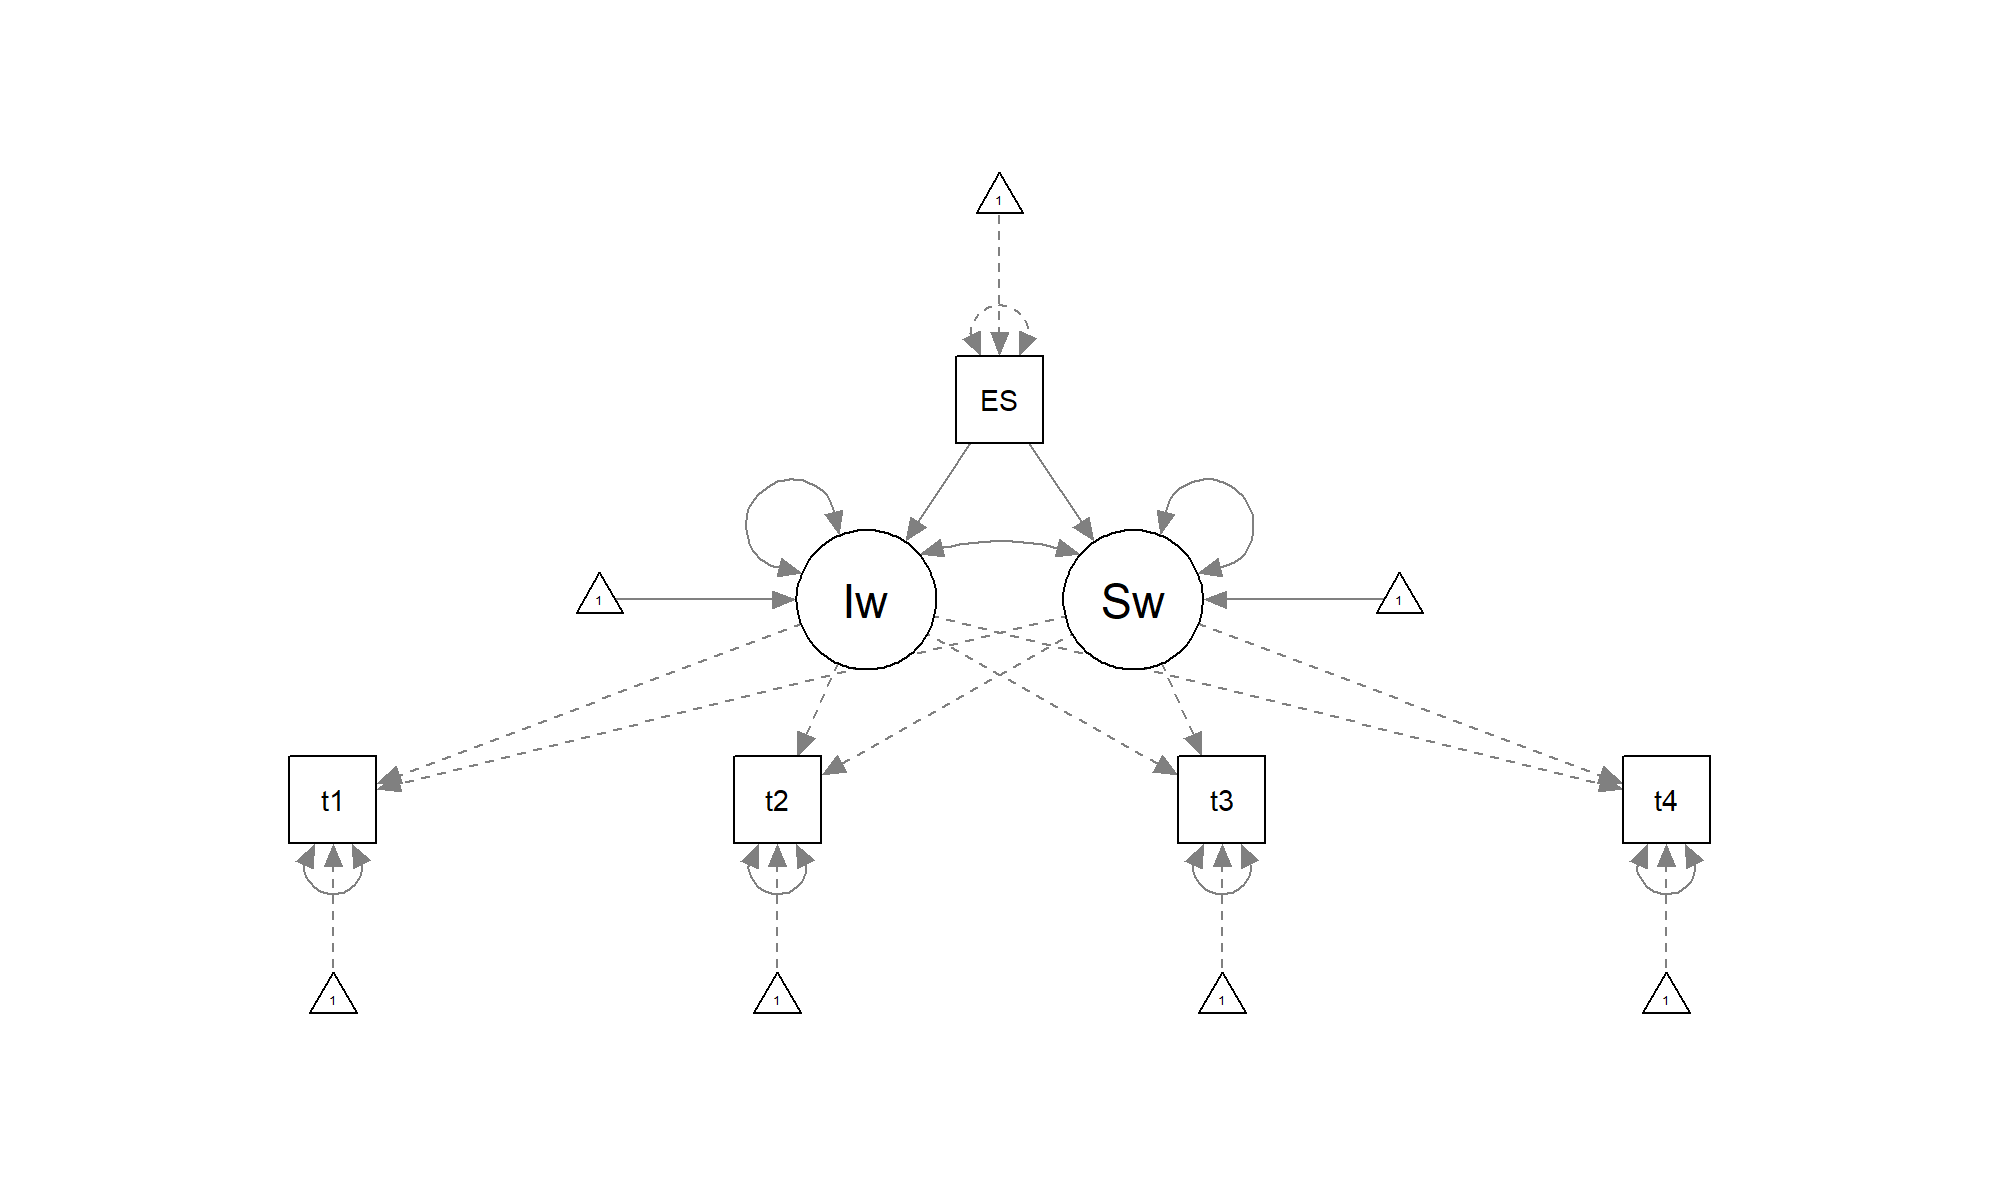

In [ ]:
# Define the SEM model
ro.r('''
GCM4 <- '

#Intercept factor loadings are fixed to 1
Iw =~ 1*t1 + 1*t2 + 1*t3 + 1*t4

#Slope factor loadings are increasingly fixed
Sw =~ 0*t1 + 1*t2 + 2*t3 + 3*t4
     
# Structural Model: ES predicting the growth factors
# ES predicts the intercept factor (initial level of anxiety)
Iw ~ ES
     
# ES predicts the slope factor (rate of change in anxiety)
Sw ~ ES
'
     
''')

# Fit the SEM model
ro.r('fit4 <- growth(GCM4, data=anx)')

# Display the summary of the SEM model
summary = ro.r('summary(fit4, fit.measures=TRUE, standardized=TRUE)')
print(summary)

# Save the SEM path diagram as a PNG file
ro.r('''
png("../LSCM_and_GCM/Datasets/semPath4.png", width = 2000, height = 1200, res = 150)
semPaths(fit4)
dev.off()
''')

# Display the saved SEM path diagram in Jupyter Notebook
display(Image(filename="../LSCM_and_GCM/Datasets/semPath4.png"))

### 10. Interpretation of the Conditional GCM

**Model Fit:**
The model fit for this conditional GCM is very good. The CFI (0.982) and TLI (0.974) are high, and the SRMR (0.045) is low, all indicating that the model represents the data well. While the Chi-Square test is significant and the RMSEA (0.079) is on the higher side of acceptable, the overall fit is strong enough to confidently interpret the parameter estimates.

**Main Findings (The Effect of the Covariate):**
The primary goal of this model was to determine if parental employment status (`ES`) could explain some of the individual differences in anxiety growth trajectories. This is assessed in the **`Regressions`** section of the output.

* **Effect of ES on the Intercept (`Iw ~ ES`):** The path from `ES` to the latent intercept (`Iw`) was **not statistically significant** (Estimate = -0.034, p = 0.398). This indicates that there is no evidence of a relationship between parents' employment status and a child's initial level of anxiety.
* **Effect of ES on the Slope (`Sw ~ ES`):** Similarly, the path from `ES` to the latent slope (`Sw`) was **not statistically significant** (Estimate = 0.008, p = 0.520). This suggests that parents' employment status does not predict the rate at which a child's anxiety changes over time.

In summary, based on this model, we cannot conclude that parental employment status is a significant predictor of either the starting point or the trajectory of children's anxiety.

**Conditional Means (The Intercepts):**
With a predictor in the model, the intercepts of the latent factors now represent the expected values for the *reference group*, which is when `ES = 0` (children whose parents are unemployed).
* The intercept for `.Iw` is **0.714**. This is the estimated average initial anxiety level for children with unemployed parents.
* The intercept for `.Sw` is **-0.066**. This is the estimated average rate of change in anxiety for children with unemployed parents.

**Residual Variances:**
The variances of the latent factors now represent the *residual* variance—the individual differences that are left over *after* accounting for the effect of `ES`.
* The residual variances for both the intercept (`.Iw` = 0.151) and the slope (`.Sw` = 0.007) are still significant. This is an important finding. It tells us that even after considering parental employment status, there are still substantial and unexplained individual differences in both the starting levels and the growth rates of anxiety. This suggests that other factors, not included in this model, are influencing these trajectories.